# IMDB 5000 Movie Dataset Multivariate Exploratory Analysis

================================================================================================================================

**AUTHOR**: Mengshan Jin

**CREATION DATE**: 07/27/2017

================================================================================================================================


**PROGRAM DESCRIPTION**: Multivariate exploratory data analysis on IMDB 5000 Movie Dataset

**INPUT DATASETS**: 01_Data/movie_metadata.csv

**OUTPUT DATASETS**: 


================================================================================================================================
**PROGRAM CHANGE HISTORY**

Date|Author|Change|
----|------|------|

# Section 0: Import packages

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()
from biokit.viz import corrplot

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Section 1: Read data

In [2]:
imdb = pd.read_csv("../01_Data/movie_metadata.csv")

In [3]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Section 2: Correlation between variables

## ==>Task to do<==
Try flexdashboard in R to show interactive charts in RMD or maybe a R shiny app

## Factors to consider for a movie
1. Popularity -- num_critic_for_reviews, num_user_for_reviews, num_voted_users, ..._facebook_likes, gross
2. Quality -- imdb_score
3. Genre
4. Rating
5. Origin -- country, language
6. Year

In [4]:
pop_measures = ['num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users', 
                'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                'cast_total_facebook_likes', 'director_facebook_likes', 'movie_facebook_likes']

### Option 1: draw with plotly

In [5]:
def plotly_scatter(df, col1, col2):
    trace = Scatter(
        x=df[col1],
        y=df[col2],
        mode='markers'
    )
    data = [trace]

    layout = Layout(
        title='IMDB Multivariate Visualization',
        xaxis=dict(
            title=col1,
            titlefont=dict(
                size=16
            )
        ),
        yaxis=dict(
            title=col2,
            titlefont=dict(
                size=16
            )
        )
    )

    fig = dict(data=data, layout=layout)
    iplot(fig, filename='correlation chart')

### Option 2: draw with seaborn

In [6]:
def correlation_plot(df, var_list):
    corr = df[var_list].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
plotly_scatter(imdb, "num_critic_for_reviews", "num_user_for_reviews")

In [8]:
plotly_scatter(imdb, "num_critic_for_reviews", "num_voted_users")

In [9]:
plotly_scatter(imdb, "num_user_for_reviews", "num_voted_users")

### Correlation heatmap with ellipses

C:\users\usz0b3l\AppData\Local\Continuum\Anaconda2\lib\site-packages\biokit\viz\linkage.py:41: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



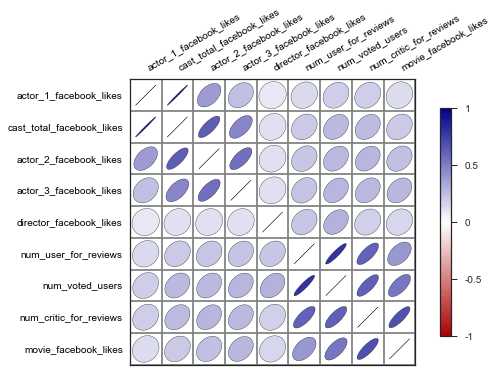

In [10]:
c = corrplot.Corrplot(imdb[pop_measures].corr())
c.plot()

#### Correlation between popularity and quality(imdb_score)

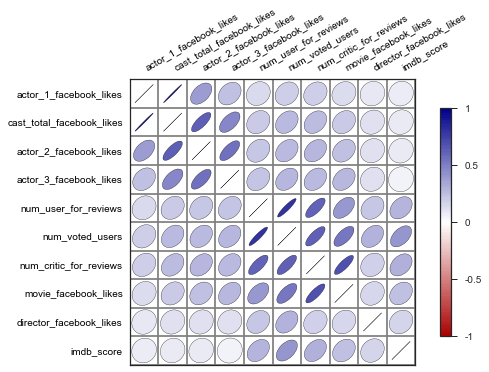

In [11]:
c = corrplot.Corrplot(imdb[pop_measures + ['imdb_score']].corr())
c.plot()

#### Correlation between budget and popularity/quality

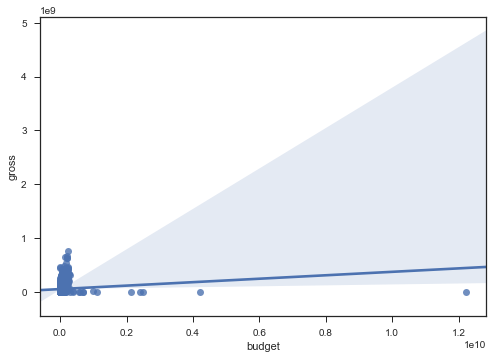

In [12]:
sns.regplot(x="budget", y="gross", data=imdb)
# looks like there are a few outliers in the budget

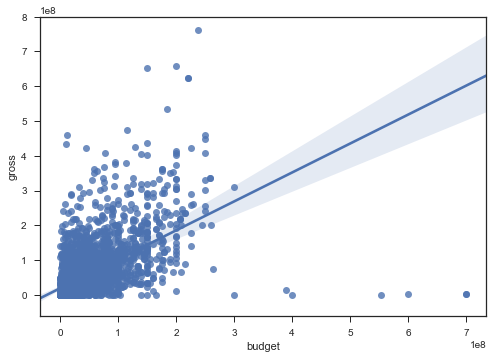

In [13]:
sns.regplot(x="budget", y="gross", data=imdb.loc[imdb['budget'] < 1e9])

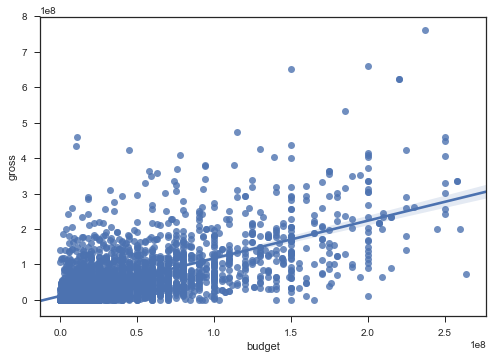

In [14]:
sns.regplot(x="budget", y="gross", data=imdb.loc[imdb['budget'] < 3e8])

### Correlation between budget and imdb_score

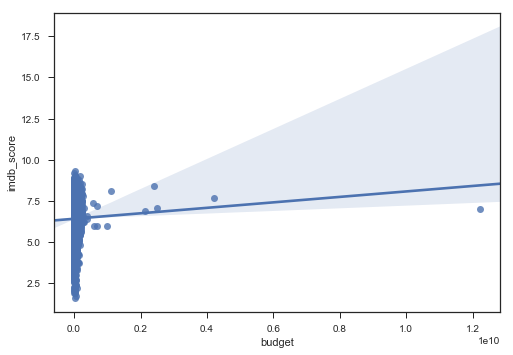

In [15]:
sns.regplot(x="budget", y="imdb_score", data=imdb)

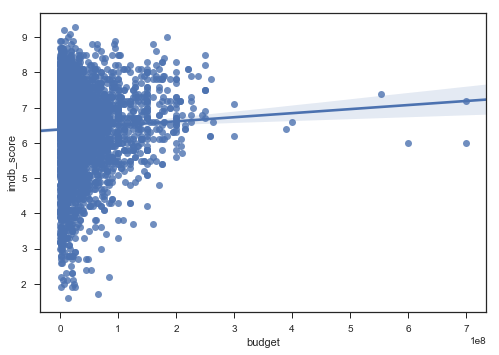

In [16]:
sns.regplot(x="budget", y="imdb_score", data=imdb.loc[imdb['budget'] < 1e9])

### By genres

In [36]:
def get_flattened_df(df, col, ind):
    tmp = pd.concat([pd.Series(row[col], row[ind].split('|')) for _, row in df.iterrows()]).reset_index()
    tmp.columns = [ind, col]
    return tmp

In [18]:
genres_df = get_flattened_df(imdb, 'budget', 'genres')
genres_df = pd.concat([genres_df, get_flattened_df(imdb, 'gross', 'genres')['gross']], axis=1)
genres_df = pd.concat([genres_df, get_flattened_df(imdb, 'imdb_score', 'genres')['imdb_score']], axis=1)
genres_df = pd.concat([genres_df, get_flattened_df(imdb, 'duration', 'genres')['duration']], axis=1)
for item in pop_measures:
    genres_df = pd.concat([genres_df, get_flattened_df(imdb, item, 'genres')[item]], axis=1)

In [19]:
genres_df.head(10)

,genres,budget,gross,imdb_score,duration,num_critic_for_reviews,num_user_for_reviews,num_voted_users,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,director_facebook_likes,movie_facebook_likes
0,Action,237000000.0,760505847.0,7.9,178.0,723.0,3054.0,886204,1000.0,936.0,855.0,4834,0.0,33000
1,Adventure,237000000.0,760505847.0,7.9,178.0,723.0,3054.0,886204,1000.0,936.0,855.0,4834,0.0,33000
2,Fantasy,237000000.0,760505847.0,7.9,178.0,723.0,3054.0,886204,1000.0,936.0,855.0,4834,0.0,33000
3,Sci-Fi,237000000.0,760505847.0,7.9,178.0,723.0,3054.0,886204,1000.0,936.0,855.0,4834,0.0,33000
4,Action,300000000.0,309404152.0,7.1,169.0,302.0,1238.0,471220,40000.0,5000.0,1000.0,48350,563.0,0
5,Adventure,300000000.0,309404152.0,7.1,169.0,302.0,1238.0,471220,40000.0,5000.0,1000.0,48350,563.0,0
6,Fantasy,300000000.0,309404152.0,7.1,169.0,302.0,1238.0,471220,40000.0,5000.0,1000.0,48350,563.0,0
7,Action,245000000.0,200074175.0,6.8,148.0,602.0,994.0,275868,11000.0,393.0,161.0,11700,0.0,85000
8,Adventure,245000000.0,200074175.0,6.8,148.0,602.0,994.0,275868,11000.0,393.0,161.0,11700,0.0,85000
9,Thriller,245000000.0,200074175.0,6.8,148.0,602.0,994.0,275868,11000.0,393.0,161.0,11700,0.0,85000


In [20]:
genres = Counter([item for sublist in list(imdb['genres'].str.split('|')) for item in sublist])
genres = pd.DataFrame(genres.most_common()).set_index([0], drop=True)
del genres.index.name
genres.columns = ['Count']

In [21]:
genres.loc[genres['Count'] > 10].index.tolist()

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Adventure',
 'Crime',
 'Sci-Fi',
 'Fantasy',
 'Horror',
 'Family',
 'Mystery',
 'Biography',
 'Animation',
 'Music',
 'War',
 'History',
 'Sport',
 'Musical',
 'Documentary',
 'Western']

In [22]:
genres_df = genres_df.loc[genres_df['genres'].isin(genres.loc[genres['Count'] > 10].index.tolist())]

In [23]:
genres_df['genres'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Documentary', 'Romance', 'Animation', 'Comedy', 'Family',
       'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport',
       'Crime', 'Horror', 'War', 'Biography', 'Music'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

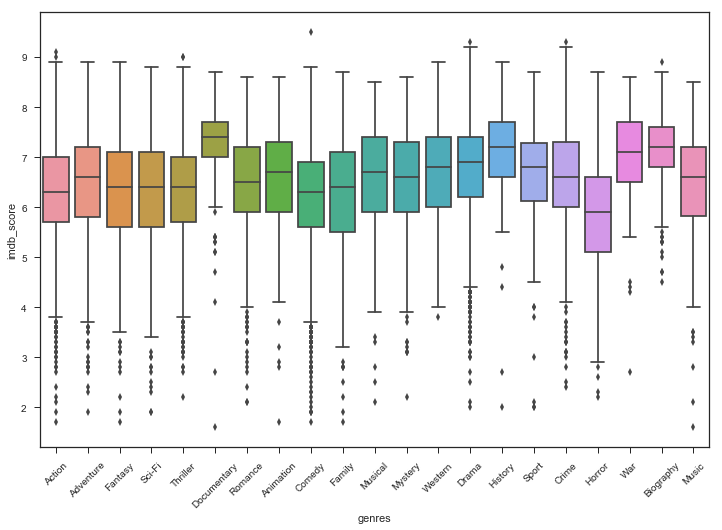

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="genres", y="imdb_score", data=genres_df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

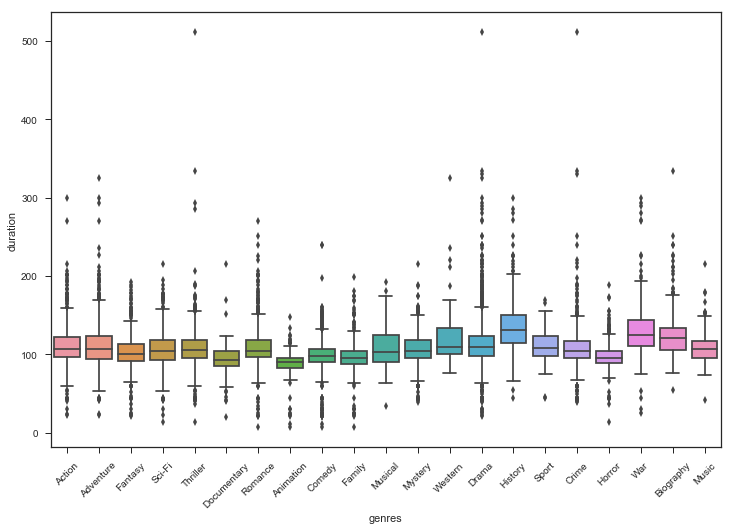

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="genres", y="duration", data=genres_df)
plt.xticks(rotation=45)

In [26]:
pop_measures

['num_critic_for_reviews',
 'num_user_for_reviews',
 'num_voted_users',
 'actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'actor_3_facebook_likes',
 'cast_total_facebook_likes',
 'director_facebook_likes',
 'movie_facebook_likes']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

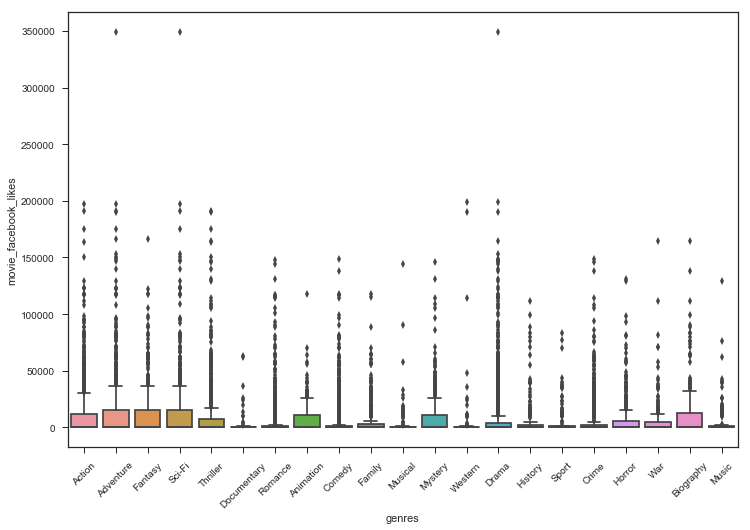

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="genres", y="movie_facebook_likes", data=genres_df)
plt.xticks(rotation=45)

### By content_rating

In [28]:
imdb['content_rating'].value_counts()[:7]

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
Name: content_rating, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

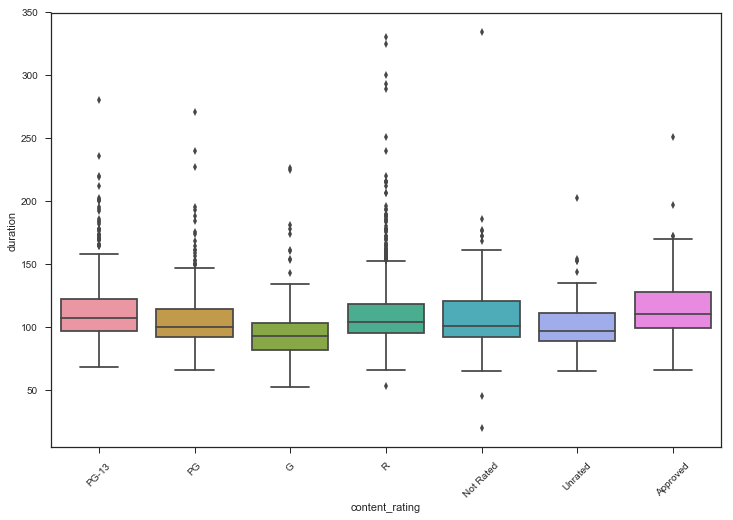

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="content_rating", y="duration", data=imdb.loc[imdb['content_rating'].isin(imdb['content_rating'].value_counts()[:7].index.tolist())])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

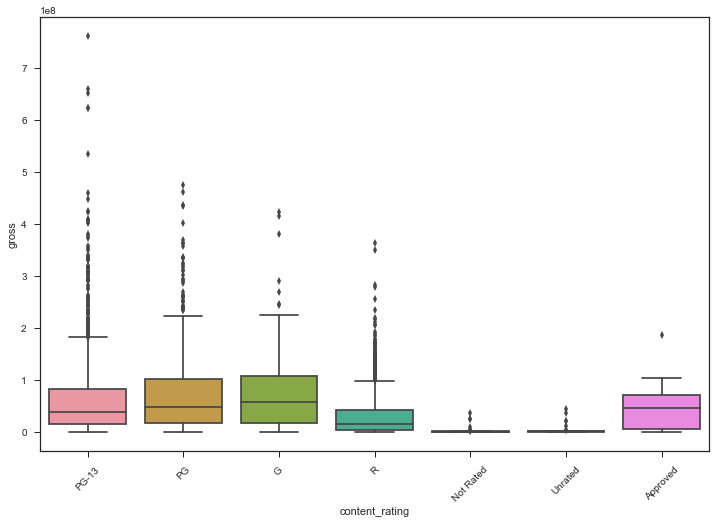

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="content_rating", y="gross", data=imdb.loc[imdb['content_rating'].isin(imdb['content_rating'].value_counts()[:7].index.tolist())])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

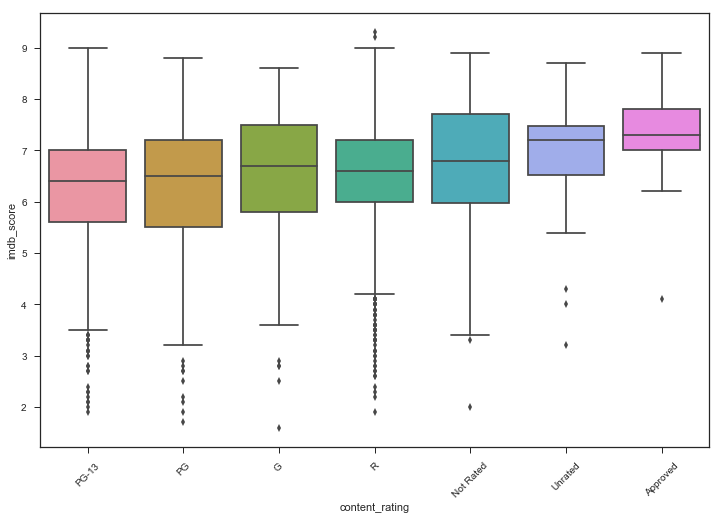

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="content_rating", y="imdb_score", data=imdb.loc[imdb['content_rating'].isin(imdb['content_rating'].value_counts()[:7].index.tolist())])
plt.xticks(rotation=45)

#### ==>Task to do<==
What is the difference between **Not Rated** and **Unrated**?

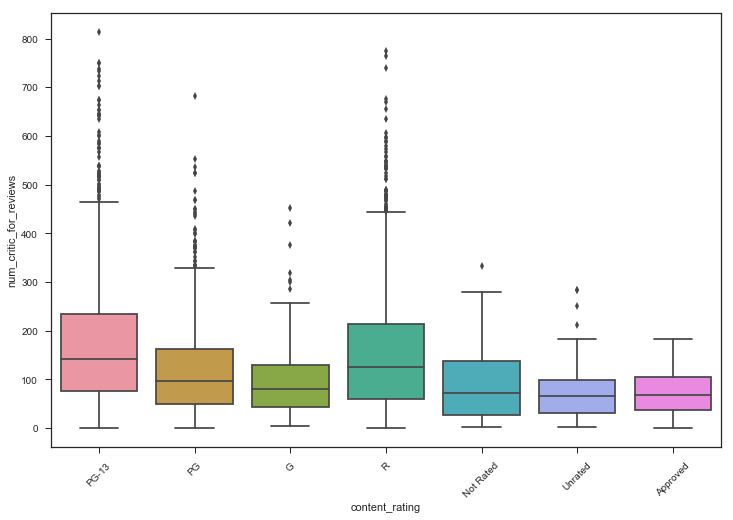

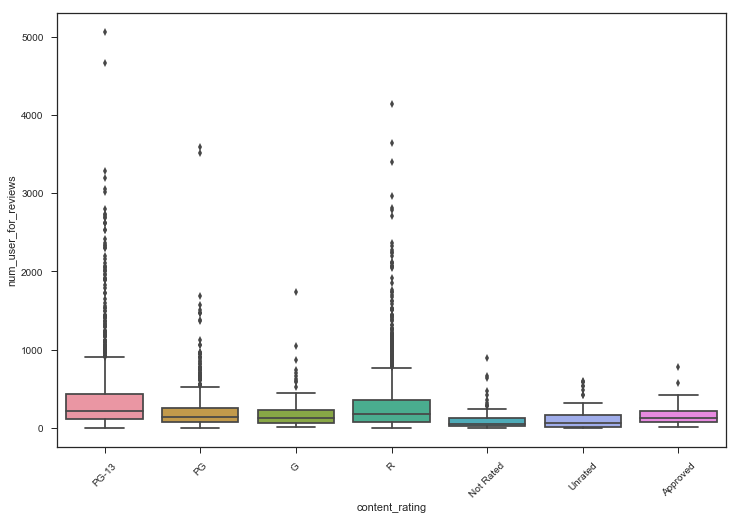

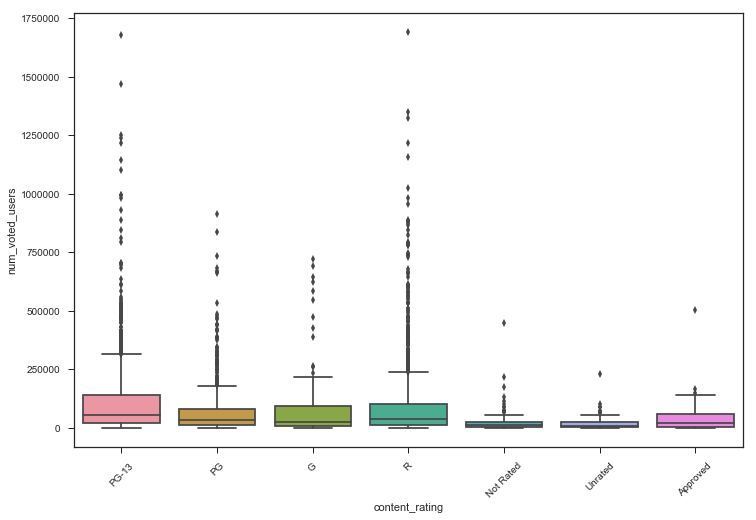

In [32]:
for item in pop_measures[:3]:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="content_rating", y=item, data=imdb.loc[imdb['content_rating'].isin(imdb['content_rating'].value_counts()[:7].index.tolist())])
    plt.xticks(rotation=45)

### By country

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

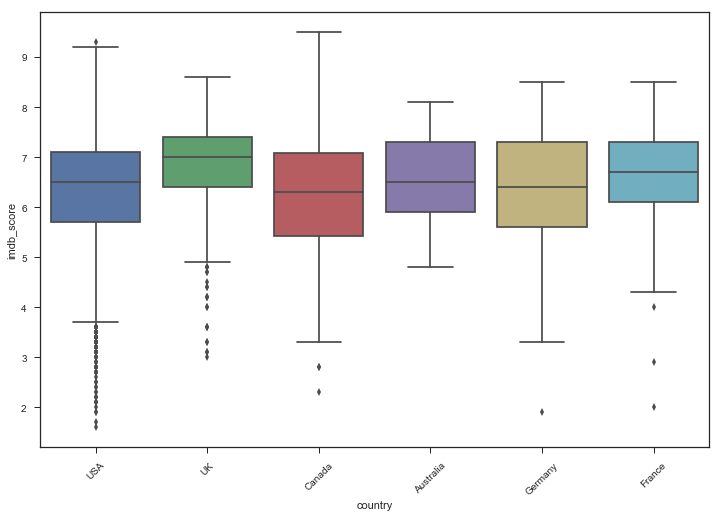

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="country", y="imdb_score", data=imdb.loc[imdb['country'].isin(imdb['country'].value_counts()[:6].index.tolist())])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

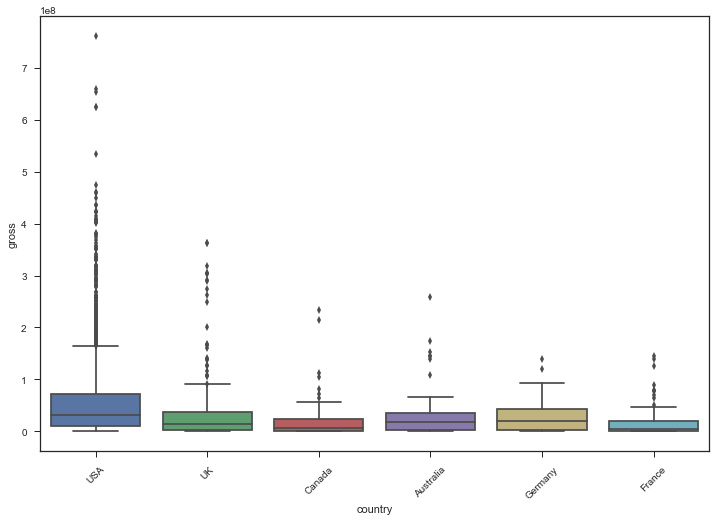

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="country", y="gross", data=imdb.loc[imdb['country'].isin(imdb['country'].value_counts()[:6].index.tolist())])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

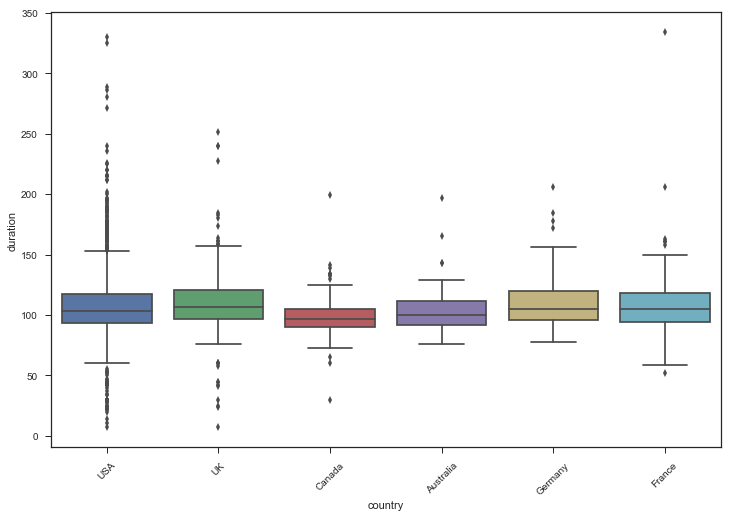

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="country", y="duration", data=imdb.loc[imdb['country'].isin(imdb['country'].value_counts()[:6].index.tolist())])
plt.xticks(rotation=45)

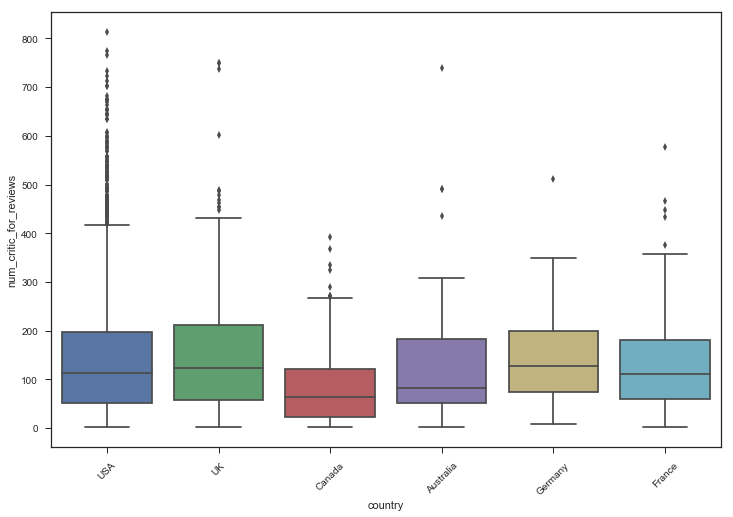

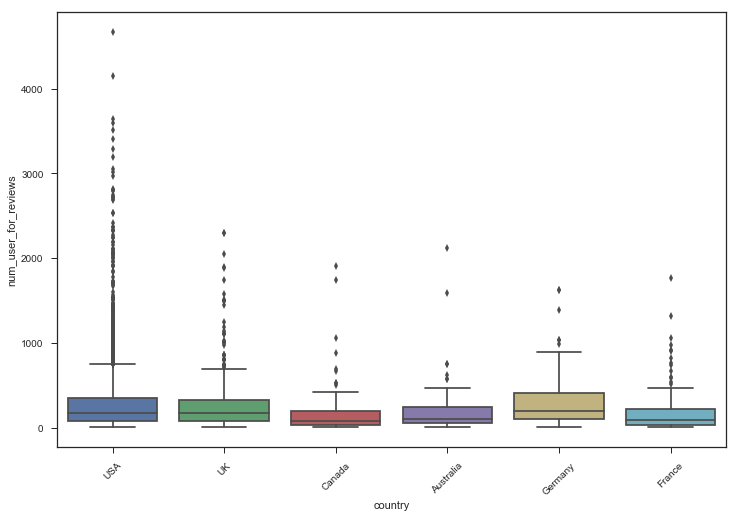

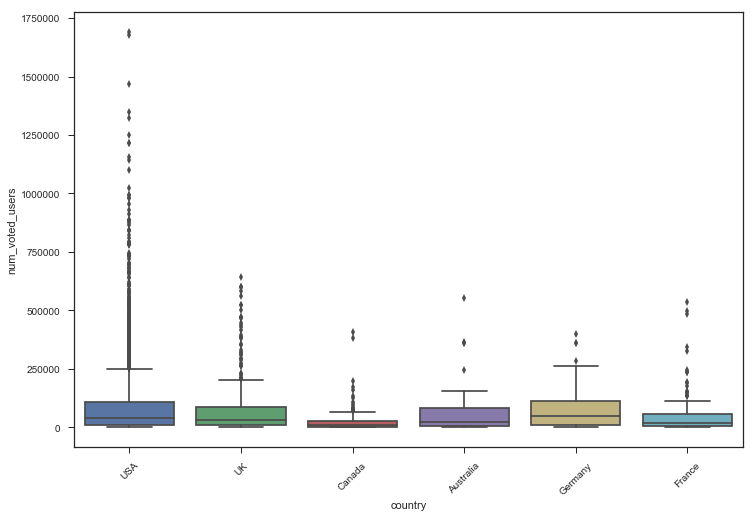

In [36]:
for item in pop_measures[:3]:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="country", y=item, data=imdb.loc[imdb['country'].isin(imdb['country'].value_counts()[:6].index.tolist())])
    plt.xticks(rotation=45)

### By language

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

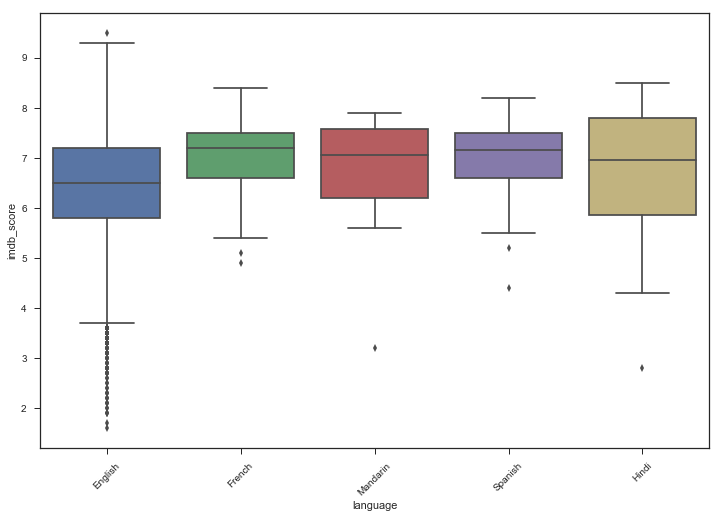

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="language", y="imdb_score", data=imdb.loc[imdb['language'].isin(imdb['language'].value_counts()[:5].index.tolist())])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

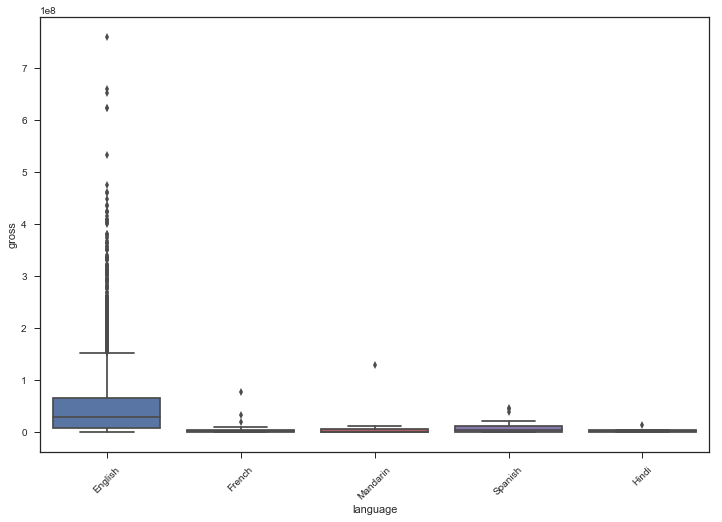

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="language", y="gross", data=imdb.loc[imdb['language'].isin(imdb['language'].value_counts()[:5].index.tolist())])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

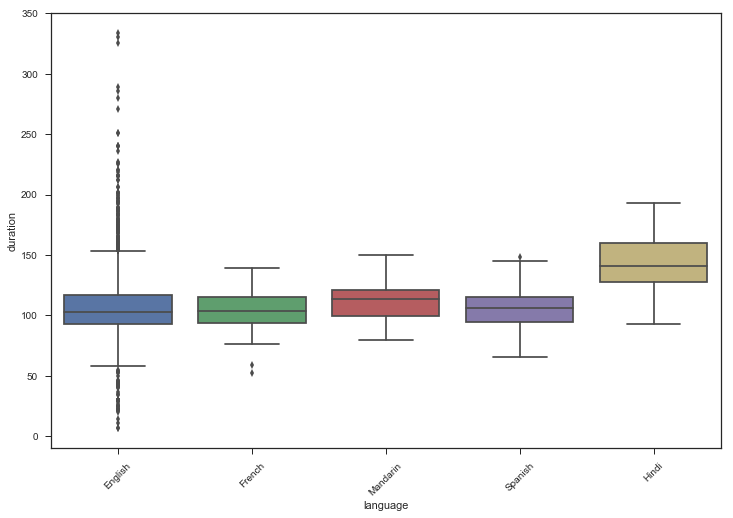

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="language", y="duration", data=imdb.loc[imdb['language'].isin(imdb['language'].value_counts()[:5].index.tolist())])
plt.xticks(rotation=45)

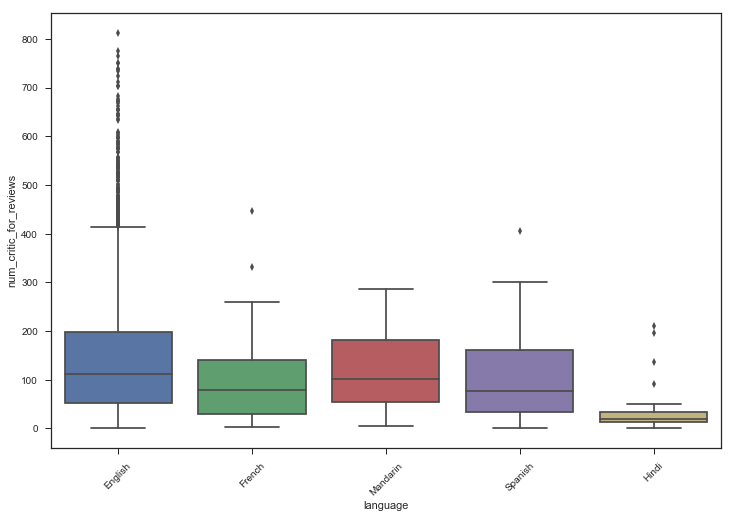

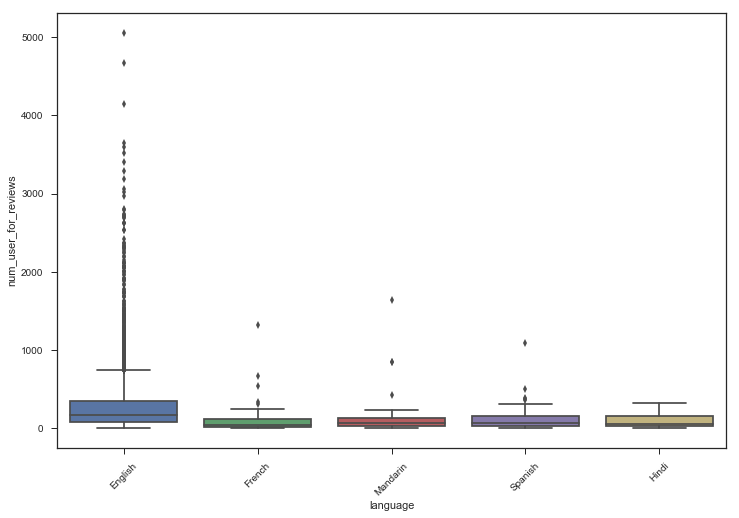

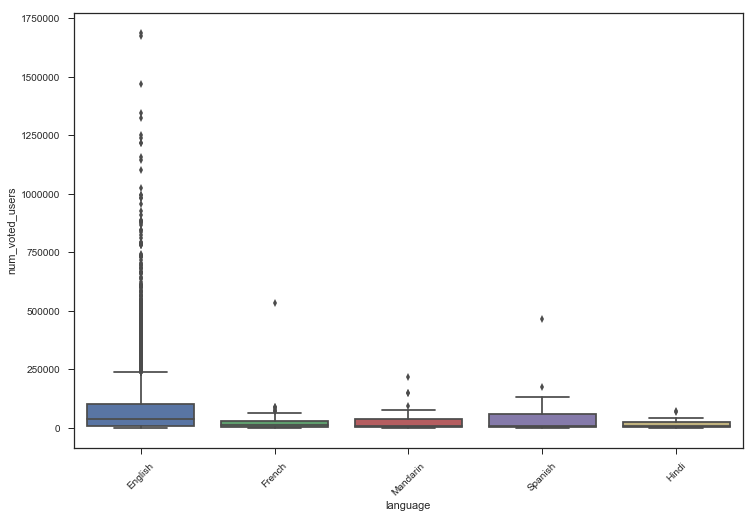

In [40]:
for item in pop_measures[:3]:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x="language", y=item, data=imdb.loc[imdb['language'].isin(imdb['language'].value_counts()[:5].index.tolist())])
    plt.xticks(rotation=45)

### By title_year

In [23]:
title_year = pd.DataFrame(imdb.groupby('title_year').size())
title_year.index.name = None
title_year.index = title_year.index.map(int)
title_year.columns = ['Count']

In [24]:
trace = Scatter(
    x=title_year.index,
    y=title_year['Count'],
    opacity = 0.8)

data = [trace]

layout = dict(
    title='Number of movies per title year',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5y',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date',
        tickformat='%Y'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Movie Count with Rangeslider")

In [9]:
title_year = pd.DataFrame(imdb.groupby('title_year').agg({'aspect_ratio':'mean'}))
title_year.index.name = None
title_year.index = title_year.index.map(int)
title_year.columns = ['aspect_ratio']

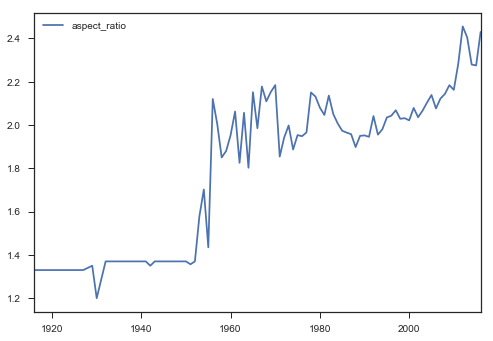

In [11]:
title_year.plot()

In [16]:
imdb.loc[imdb['aspect_ratio'] > 3]['aspect_ratio'].value_counts()
# I still think aspect_ratio = 16 means it's 16:9

16.0    45
4.0      7
Name: aspect_ratio, dtype: int64

In [25]:
title_year = pd.DataFrame(imdb.groupby('title_year').agg({'imdb_score':'mean'}))
title_year.index.name = None
title_year.index = title_year.index.map(int)
title_year.columns = ['Avg_IMDB_Score']

In [26]:
trace = Scatter(
    x=title_year.index,
    y=title_year['Avg_IMDB_Score'],
    opacity = 0.8)

data = [trace]

layout = dict(
    title='Average IMDB Score per title year',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5y',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date',
        tickformat='%Y'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Average IMDB Score with Rangeslider")

In [19]:
title_year = pd.DataFrame(imdb.groupby('title_year').agg({'movie_facebook_likes':'mean'}))
title_year.index.name = None
title_year.index = title_year.index.map(int)
title_year.columns = ['movie_facebook_likes']

In [21]:
trace = Scatter(
    x=title_year.index,
    y=title_year['movie_facebook_likes'],
    opacity = 0.8)

data = [trace]

layout = dict(
    title='Average movie Facebook likes per title year',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5y',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date',
        tickformat='%Y'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Average movie Facebook likes with Rangeslider")

In [62]:
title_year = pd.DataFrame(imdb.groupby('title_year').agg({'duration':'mean'}))
title_year.index.name = None
title_year.index = title_year.index.map(int)
title_year.columns = ['duration']

In [63]:
trace = Scatter(
    x=title_year.index,
    y=title_year['duration'],
    opacity = 0.8)

data = [trace]

layout = dict(
    title='Average movie duration per title year',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5y',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date',
        tickformat='%Y'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Average movie duration with Rangeslider")

#### Show number of movies as bars and average IMDB scores as a line

In [7]:
title_year_count = pd.DataFrame(imdb.groupby('title_year').size())
title_year_count.index.name = None
title_year_count.index = title_year_count.index.map(int)
title_year_count.columns = ['Count']

title_year_score = pd.DataFrame(imdb.groupby('title_year').agg({'imdb_score':'mean'}))
title_year_score.index.name = None
title_year_score.index = title_year_score.index.map(int)
title_year_score.columns = ['Avg_IMDB_Score']

In [18]:
trace1 = Bar(
    x=title_year_count.index,
    y=title_year_count['Count'],
    name='Number of movies'
)

trace2 = Scatter(
    x=title_year_score.index,
    y=title_year_score['Avg_IMDB_Score'],
    yaxis='y2',
    name='Average IMDB score'
)

data = [trace1, trace2]

layout = Layout(
    title='Movie over the years',
    yaxis=dict(
        title='Number of movies'
    ),
    yaxis2=dict(
        title='Average IMDB score',
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.7, y=1.2),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5y',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date',
        tickformat='%Y'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "bar-line")

In [27]:
title_year_score = pd.DataFrame(imdb.groupby('title_year').agg({'imdb_score':'mean'}))
title_year_score.index.name = None
title_year_score.index = title_year_score.index.map(int)
title_year_score.columns = ['Avg_IMDB_Score']

title_year_likes = pd.DataFrame(imdb.groupby('title_year').agg({'movie_facebook_likes':'mean'}))
title_year_likes.index.name = None
title_year_likes.index = title_year_likes.index.map(int)
title_year_likes.columns = ['movie_facebook_likes']

In [29]:
trace1 = Scatter(
    x=title_year_score.index,
    y=title_year_score['Avg_IMDB_Score'],
    name='Average IMDB score'
)

trace2 = Scatter(
    x=title_year_likes.index,
    y=title_year_likes['movie_facebook_likes'],
    yaxis='y2',
    name='Average movie Facebook likes'
)

data = [trace1, trace2]

layout = Layout(
    title='Movie over the years',
    yaxis=dict(
        title='Average IMDB score'
    ),
    yaxis2=dict(
        title='Average movie Facebook likes',
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.7, y=1.2),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5,
                     label='5y',
                     step='year',
                     stepmode='backward'),
                dict(count=10,
                     label='10y',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date',
        tickformat='%Y'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "double-line")

It looks like there are some very good movies in title_year=1957, let's take a look.

In [31]:
imdb.loc[imdb['title_year']==1957]['movie_title']

4066    The Bridge on the River Kwai 
4822                    12 Angry Men 
Name: movie_title, dtype: object

### by plot_keywords

In [48]:
keywords_df = get_flattened_df(imdb.loc[imdb['plot_keywords'].notnull()], 'imdb_score', 'plot_keywords')
keywords_df = pd.concat([keywords_df, get_flattened_df(imdb.loc[imdb['plot_keywords'].notnull()], 'duration', 'plot_keywords')['duration']], axis=1)

In [50]:
keywords_df.head()

,plot_keywords,imdb_score,duration
0,avatar,7.9,178.0
1,future,7.9,178.0
2,marine,7.9,178.0
3,native,7.9,178.0
4,paraplegic,7.9,178.0


In [52]:
keywords = Counter([item for sublist in list(imdb.loc[imdb['plot_keywords'].notnull()]['plot_keywords'].str.split('|')) for item in sublist])
keywords = pd.DataFrame(keywords.most_common()).set_index([0], drop=True)
del keywords.index.name
keywords.columns = ['Count']

In [55]:
keywords[:5].index

Index([u'love', u'friend', u'murder', u'death', u'police'], dtype='object')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

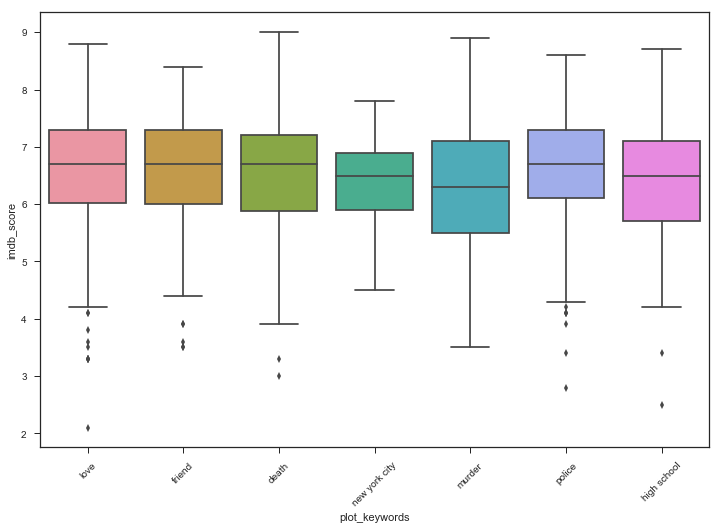

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="plot_keywords", y="imdb_score", data=keywords_df.loc[keywords_df['plot_keywords'].isin(keywords[:7].index.tolist())])
plt.xticks(rotation=45)

### facenumber_in_poster vs quality

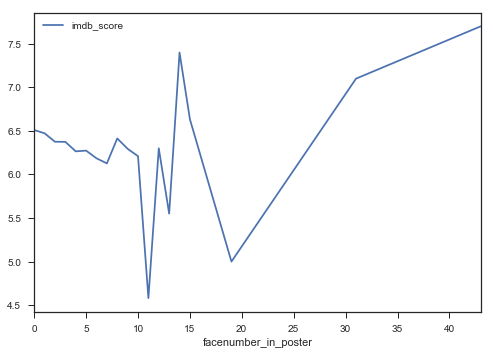

In [60]:
imdb.groupby('facenumber_in_poster').agg({'imdb_score':'mean'}).plot()

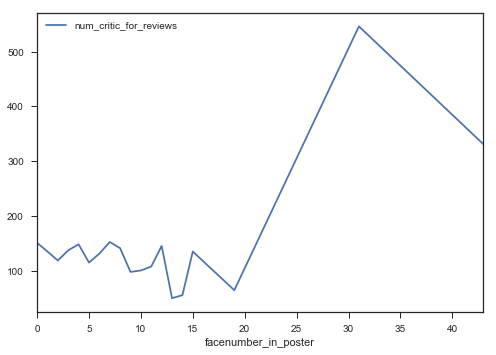

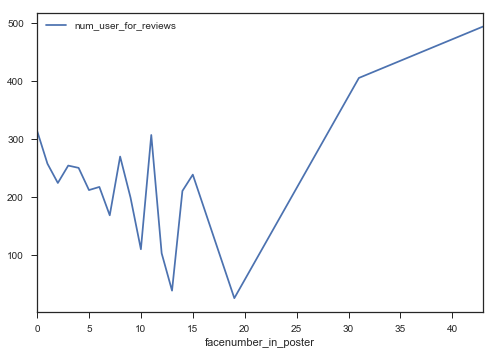

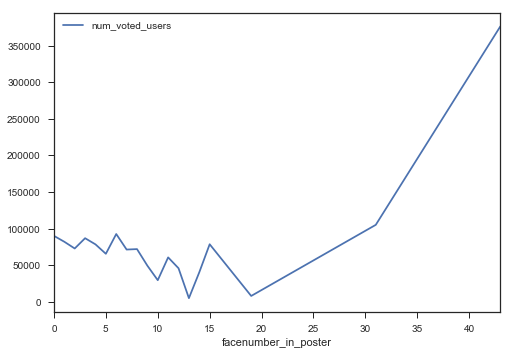

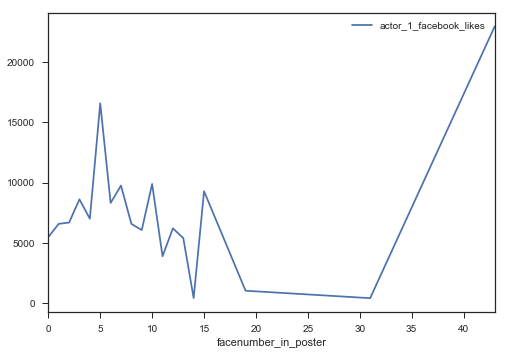

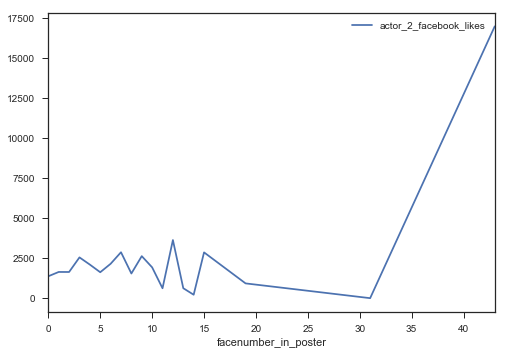

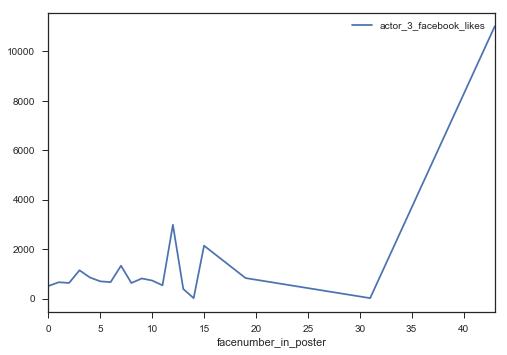

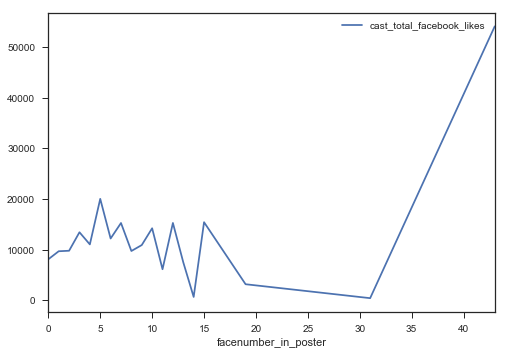

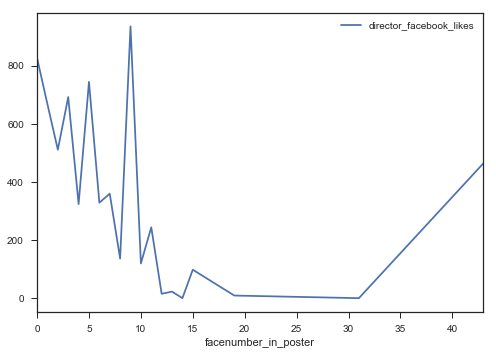

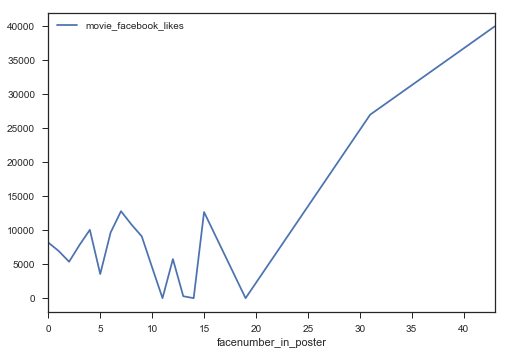

In [61]:
for item in pop_measures:
    imdb.groupby('facenumber_in_poster').agg({item:'mean'}).plot()